In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img # For image operations
from tensorflow.keras.models import Sequential # These are required for building our new model
from tensorflow.keras.layers import Dense # These are required for building our new model
from tensorflow.keras.applications.vgg16 import VGG16  # The Transfer Learning model to be used in this project...
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from PIL import Image # Python Imaging Library - For operations like: Image open, resize image, etc..
import matplotlib.pyplot as plt
import numpy as np

In [11]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK']='True' # if the kernel does not work , add this cell to your code

In [3]:
train_files_path = "weather_dataset/train/"
test_files_path = "weather_dataset/test/"

img = load_img(test_files_path+"cloudy/cloudy271.jpg")

In [4]:
print(img_to_array(img).shape)

(154, 205, 3)


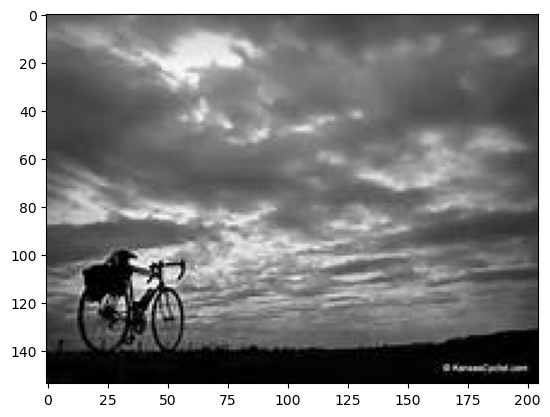

In [5]:
plt.imshow(img)
plt.show()

In [6]:
train_data = ImageDataGenerator().flow_from_directory(train_files_path,target_size=(224,224))
#VGG16 use this image size(224,224)
test_data = ImageDataGenerator().flow_from_directory(test_files_path,target_size=(224,224))


Found 1012 images belonging to 4 classes.
Found 113 images belonging to 4 classes.


In [7]:
number_of_weather_types= 4

In [8]:
# let's build our model

In [9]:
vgg = VGG16()

553467096/553467096 [==============================] - 25s 0us/step


In [10]:
vgg_layers = vgg.layers
print(vgg.layers)

[<keras.engine.input_layer.InputLayer object at 0x00000224CAE80E80>, <keras.layers.convolutional.conv2d.Conv2D object at 0x00000224CAE54490>, <keras.layers.convolutional.conv2d.Conv2D object at 0x00000224CA63E3E0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000224CAE83520>, <keras.layers.convolutional.conv2d.Conv2D object at 0x00000224CA5E9900>, <keras.layers.convolutional.conv2d.Conv2D object at 0x00000224CA701E10>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000224CA7030D0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x00000224CA5ABB20>, <keras.layers.convolutional.conv2d.Conv2D object at 0x00000224CA6D9CC0>, <keras.layers.convolutional.conv2d.Conv2D object at 0x00000224CA71A0B0>, <keras.layers.pooling.max_pooling2d.MaxPooling2D object at 0x00000224CA736530>, <keras.layers.convolutional.conv2d.Conv2D object at 0x00000224CA71B370>, <keras.layers.convolutional.conv2d.Conv2D object at 0x00000224CA737E20>, <keras.layers.convolutional.conv2d

In [12]:
vggmodel_layersize_tobe_used = len(vgg_layers)-1

model = Sequential()
for i in range(vggmodel_layersize_tobe_used):
    model.add(vgg_layers[i])

In [13]:
for layers in model.layers:
    layers.trainable=False

model.add(Dense(number_of_weather_types,activation="softmax"))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
# model design is complete. It is time to compile

In [16]:
model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [17]:
batch_size = 4 

model.fit_generator(train_data,
                           steps_per_epoch=400//batch_size,
                           epochs= 3, # You can increase epoch size if you have a computer with good specs...
                           validation_data=test_data,
                           validation_steps= 200//batch_size)

C:\Users\16088\AppData\Local\Temp\ipykernel_17968\1646758556.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_data,


Epoch 1/3
100/100 [==============================] - 70s 642ms/step - loss: 0.5950 - accuracy: 0.8221 - val_loss: 0.3123 - val_accuracy: 0.8673


In [18]:
# val_accuracy is around %87. Our model predicts aorund %87 correctly

In [19]:
# let's check our model with examples

In [42]:
img = Image.open("rain200.jpg").resize((224,224))

In [43]:
# we need to convert it to array format

In [44]:
img = np.array(img)

In [45]:
img.shape

(224, 224, 3)

In [46]:
img.ndim

3

In [47]:
# it has to be 4 dim array

In [48]:
img = img.reshape(-1,224, 224, 3)

In [49]:
img.shape

(1, 224, 224, 3)

In [50]:
img.ndim

4

In [51]:
# I will scale input pixels between -1 and 1 using my model's preprocess_input

In [52]:
img = preprocess_input(img) 

In [53]:
# Let's see the weather

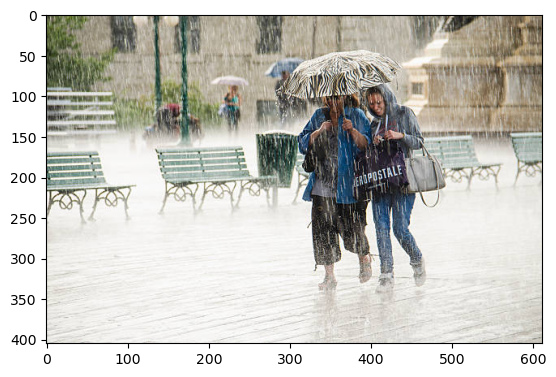

In [54]:
img_for_display = load_img("rain200.jpg")
plt.imshow(img_for_display)
plt.show()

In [55]:
preds = model.predict(img)

1/1 [==============================] - 0s 131ms/step


In [56]:
preds

array([[1.1119831e-06, 9.9997365e-01, 1.2310252e-05, 1.2985686e-05]],
      dtype=float32)

In [59]:
image_classes = ["cloudy","rain","shine","sunrise"]
result = np.argmax(preds[0])
print("Model's prediction:",image_classes[result])

Model's prediction: rain
